In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns
%matplotlib inline
# Any results you write to the current directory are saved as output.

In [41]:
train = pd.read_csv('../input/train.csv')

In [42]:
train.shape

(1458644, 11)

In [43]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [44]:
train.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [45]:
train.trip_duration = train.trip_duration/60

In [46]:
# Remove outliers, keep only lower 99 quantile of trip duration
trip_duration_99 = train.trip_duration.quantile(0.99)
train = train[train.trip_duration < trip_duration_99]

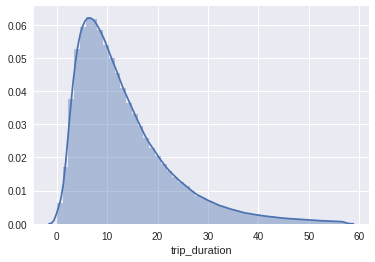

In [47]:
sns.distplot(train.trip_duration)

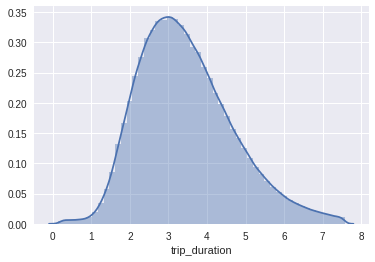

In [48]:
# Squareroot transform trip duration to normalize data
sns.distplot(np.sqrt(train.trip_duration))

In [55]:
traintrip_duration_sqrt = np.sqrt(train.trip_duration)

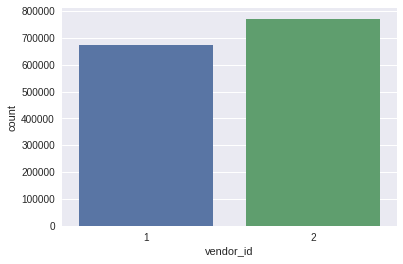

In [50]:
sns.countplot(train.vendor_id)

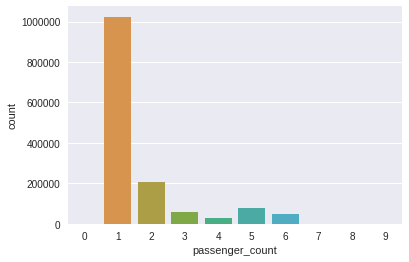

In [51]:
sns.countplot(train.passenger_count)

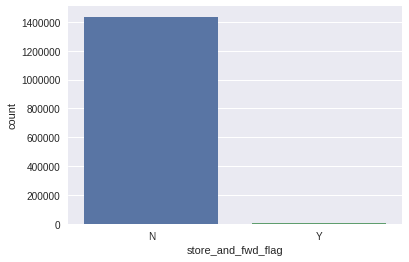

In [52]:
sns.countplot(train.store_and_fwd_flag)

In [53]:
train.store_and_fwd_flag.value_counts()

N    1436251
Y       7800
Name: store_and_fwd_flag, dtype: int64

In [54]:
sns.boxplot(x = train.vendor_id, y = train.trip_duration_sqrt)

AttributeError: 'DataFrame' object has no attribute 'trip_duration_sqrt'

In [ ]:
sns.boxplot(x = train.passenger_count, y = train.trip_duration_sqrt)

In [ ]:
sns.boxplot(x = train.store_and_fwd_flag, y = train.trip_duration_sqrt)

In [ ]:
train.pickup_datetime = pd.to_datetime(train.pickup_datetime)
train["pickup_month"] = train.pickup_datetime.dt.month
train["pickup_dow"] = train.pickup_datetime.dt.dayofweek
train["pickup_hour"] = train.pickup_datetime.dt.hour

In [ ]:
train.head()

In [ ]:
sns.pointplot(x = "pickup_hour", y = "trip_duration_sqrt", data = train)